# Cryptocurrency(BTC) Data Analytics Project 🥑
---
## What does  5 years of data (2020-2025) suggest about BTC price trends and patterns?
---
---

## 1. Extracting Data & Defining the Cryptocurrency Ticker (Bitcoin)
---
- pull data directly from Yahoo Finance (5 yrs)
- take a quick look at the dataset to see the features

In [1]:
#Retrieving Data from Yahoo Finance
import pandas as pd
import yfinance as yf


In [2]:
ticker = "BTC-USD"

# Fetch historical data
df = yf.download(ticker, start="2020-01-09", end="2025-01-09")

# Display the first 5 rows
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-09  7879.071289  8082.295898  7842.403809  8082.295898  24045990466
2020-01-10  8166.554199  8166.554199  7726.774902  7878.307617  28714583844
2020-01-11  8037.537598  8218.359375  8029.642090  8162.190918  25521165085
2020-01-12  8192.494141  8200.063477  8009.059082  8033.261719  22903438381
2020-01-13  8144.194336  8197.788086  8079.700684  8189.771973  22482910688


- if you don't directly, download the data set from the website using Wi-Fi finance library, then this is the way to upload the data set from your directory:

  1. import pandas as pd
  2. Load the dataset
          df = pd.read_csv("BTC-USD.csv")  # Replace with your file path

- other ways to retrieve data and code:
  1. pd.read_html(url) → Extract tables from websites
  2. Web scraping (using requests & BeautifulSoup)
  3. API calls (if the website provides one)


# 2. Cleaning the Data
---
- make sure no missing values
- resetting index so analysis charts will run properly
- convert dates to datetime format

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values, removes row with missing val
df.dropna(inplace=True)

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


In [5]:
print(df.columns)

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


In [4]:
# Reset the index to move the date into a column
df.reset_index(inplace=True) #in place equals true means it does the edit directly to the data set without making a new one
# .reset_index assigns a new column to be the Index automatically

# Check the first few rows again
print(df.head())

Price        Date        Close         High          Low         Open  \
Ticker                 BTC-USD      BTC-USD      BTC-USD      BTC-USD   
0      2020-01-09  7879.071289  8082.295898  7842.403809  8082.295898   
1      2020-01-10  8166.554199  8166.554199  7726.774902  7878.307617   
2      2020-01-11  8037.537598  8218.359375  8029.642090  8162.190918   
3      2020-01-12  8192.494141  8200.063477  8009.059082  8033.261719   
4      2020-01-13  8144.194336  8197.788086  8079.700684  8189.771973   

Price        Volume  
Ticker      BTC-USD  
0       24045990466  
1       28714583844  
2       25521165085  
3       22903438381  
4       22482910688  


### before the reset index method, see the picture below how dates were in the index column

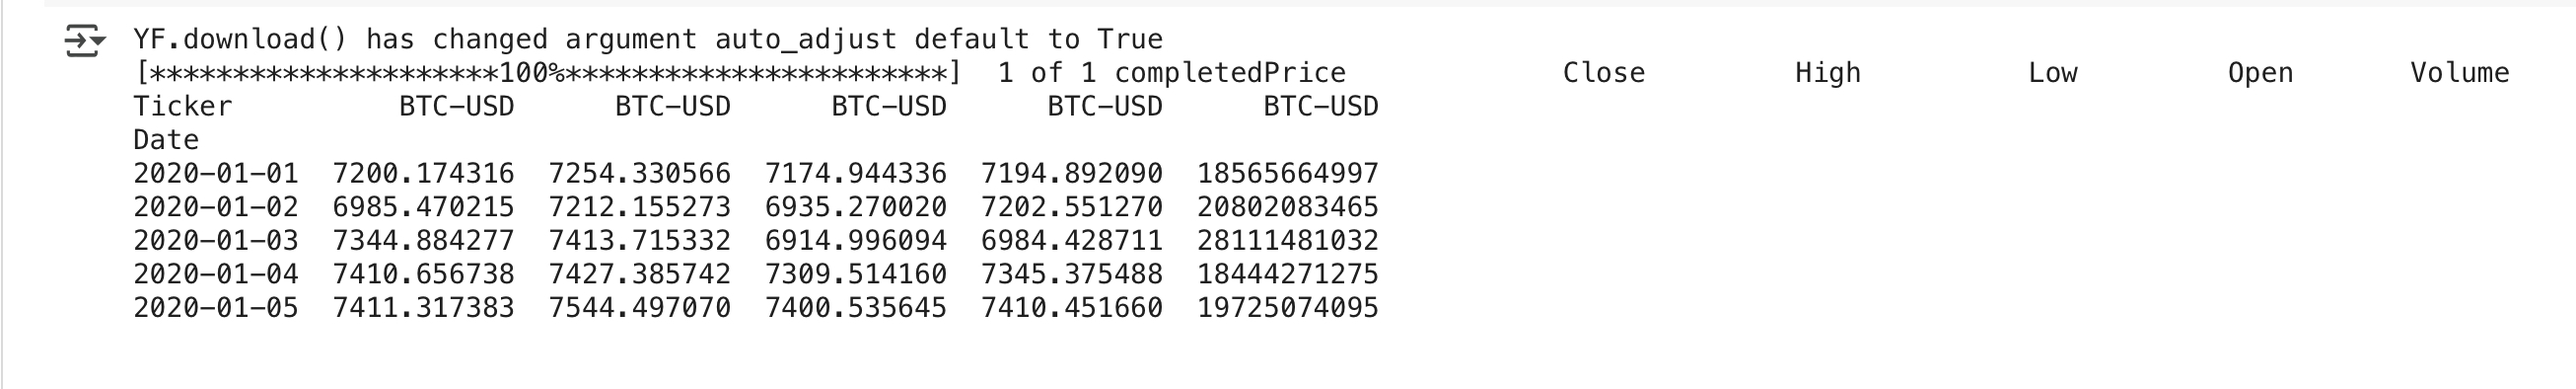

In [5]:
print(df.index)

RangeIndex(start=0, stop=1827, step=1)


In [8]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date
df = df.sort_values(by="Date")

### A method to confirm that the date time format has been applied

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           1827 non-null   datetime64[ns]
 1   (Close, BTC-USD)   1827 non-null   float64       
 2   (High, BTC-USD)    1827 non-null   float64       
 3   (Low, BTC-USD)     1827 non-null   float64       
 4   (Open, BTC-USD)    1827 non-null   float64       
 5   (Volume, BTC-USD)  1827 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 85.8 KB
None


## 3. Exploratory Data Analysis
---
### A basic overall plot to get an idea of the data and possibly get at questions like:
- What trends do we see in the closing prices?
- How volatile is the cryptocurrency?
- Are there any outliers (sudden price spikes or crashes)


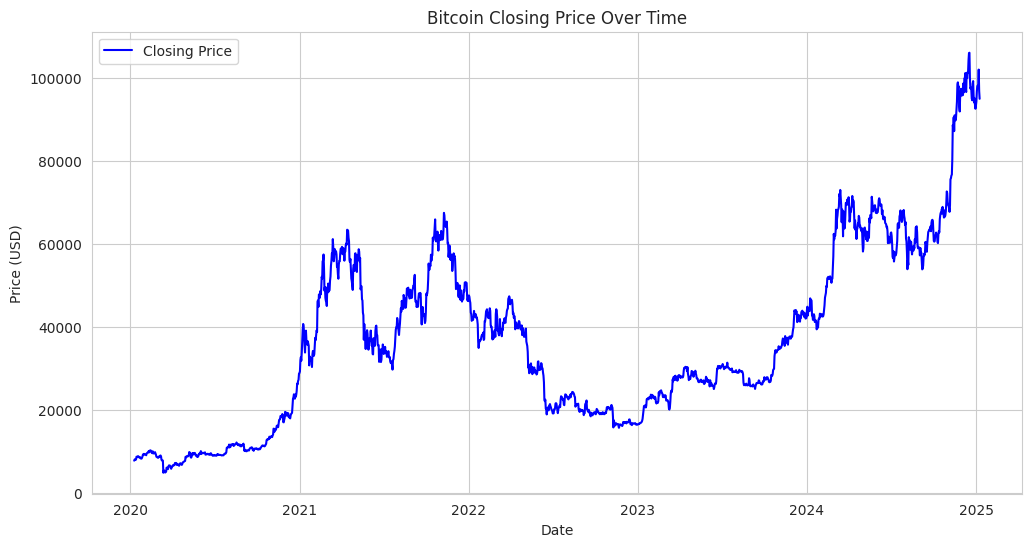

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot Closing Price Over Time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue") #the first arguments you need to select is the columns that will be used for the NY axis in your chart
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Closing Price Over Time")
plt.legend()
plt.show()

In [11]:
print(df.describe())
#not sure why 2024 statistics are not showing

Price                  Date          Close           High            Low  \
Ticker                             BTC-USD        BTC-USD        BTC-USD   
count                  1827    1827.000000    1827.000000    1827.000000   
mean    2022-07-10 00:00:00   36711.255523   37471.125712   35831.454086   
min     2020-01-09 00:00:00    4970.788086    5331.833984    4106.980957   
25%     2021-04-09 12:00:00   19870.831055   20288.457031   19368.375977   
50%     2022-07-10 00:00:00   32822.347656   34017.386719   31286.154297   
75%     2023-10-09 12:00:00   51542.957031   52252.992188   49585.943359   
max     2025-01-08 00:00:00  106140.601562  108268.445312  105291.734375   
std                     NaN   21416.934502   21857.423167   20905.057741   

Price            Open        Volume  
Ticker        BTC-USD       BTC-USD  
count     1827.000000  1.827000e+03  
mean     36666.247024  3.325207e+10  
min       5002.578125  5.331173e+09  
25%      19826.470703  2.063682e+10  
50%      32

## 4. Analyze Monthly & Yearly Trends
---
### Take a closer look at the data with a more refined chart
- Do the prices rise or fall in certain months?
- Does there appear to be any seasonal pattern?

<ipython-input-12-3ecde02679ec>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = df.groupby(["Year", "Month"])["Close"].mean().reset_index() #months were group with each year they are of


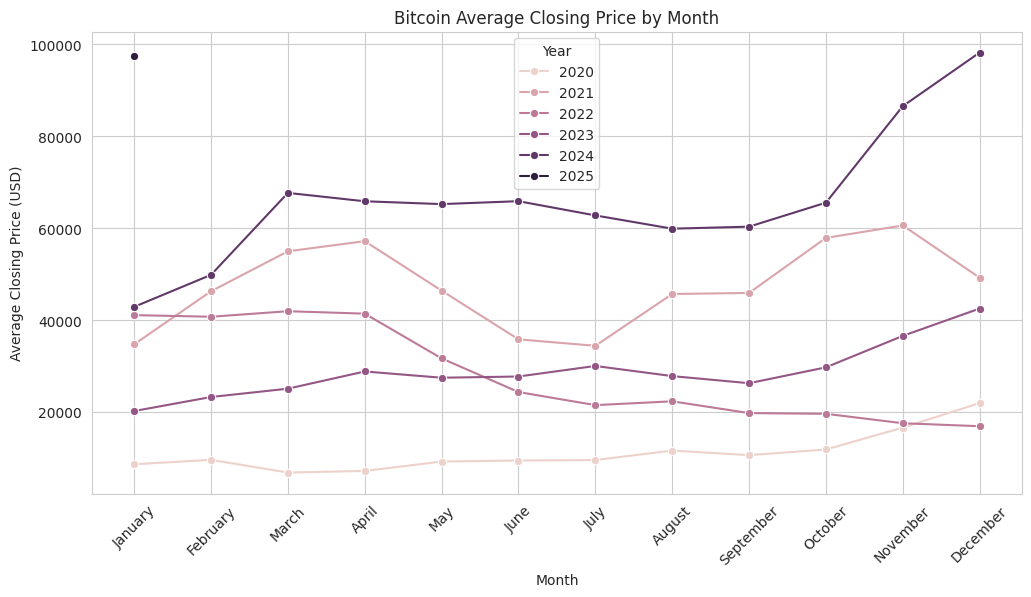

In [12]:


#Ensure 'Month' is in full text format
df["Month"] = df["Date"].dt.strftime("%B") #to format dattime objs to strs

#Define correct month order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#Convert 'Month' column to Categorical with correct order
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True) #this brings together the 1st two lines...

#Extract 'year' from the date column
df["Year"] = df["Date"].dt.year #.dt is dattime accessor and this extracts year specifically from df Date

# Group by year and month and calculate the average closing price
monthly_trends = df.groupby(["Year", "Month"])["Close"].mean().reset_index() #months were group with each year they are of

#Ensure 'Month" is converted to string before plotting
monthly_trends["Month"] = monthly_trends["Month"].astype(str)

#Ensure 'x="Month"' recieves a **1D array** (string values)
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends, x="Month", y=monthly_trends["Close"].values.flatten(), hue="Year", marker="o") #.flatten covnerts 1D to 2D

plt.title("Bitcoin Average Closing Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Closing Price (USD)")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.show()



In [13]:
print(monthly_trends["Close"].shape) #check the shape which is in 2D, was converted to 1d eariler in order to plot line plot

(72, 1)


## 5. Conclusions:
---
1. overall when comparing the 5 years, there has been a steady increase of price year after year
2. for most years, it starts low in Jan then increase for approx 3 months
3. for most years, the ending close average has been higher then the Jan average close price
4. 2025 was a peculiar year as there were significant jumps greater than other years likely influnced by special events (e.g. presidential election)
5. Particularly based on the exploratory chart, its clear BTC is very volatile is to be invested in with caution and due diligence

## Suggestions:
---
- Appears the beginning of the year is a decent time to buy
- Expected growth if purchased early or held throughtout the year

## 6. Export Monthly Findings to Excel File
---
- just for fun and additiona practice manipulating and playing with the data in different relevent programs!

In [14]:
print(monthly_trends.index)

RangeIndex(start=0, stop=72, step=1)


In [15]:
# had to do something weird to get the file to export because I moved and reset index earlier to get the data to work for the visualizations i wanted...
monthly_trends = monthly_trends.reset_index(drop=True)
monthly_trends.columns = monthly_trends.columns.to_flat_index()
monthly_trends.columns = [col if isinstance(col, str) else "_".join(map(str, col)) for col in monthly_trends.columns]
monthly_trends.to_excel("monthly_trends.xlsx", index=False) #index=false prevents pd from writing df index as seperate col in excel

# 7. Data Visualizations in Tableau
---
- Some further visualizations about BTC closing price with the same dataset in my [Tableau dashboard](https://public.tableau.com/views/BTCAverageCLosingpricebyMonth2020-2025/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

In [15]:
from IPython.display import HTML

html_code = """
<div class='tableauPlaceholder' id='viz1741872673109' style='position: relative'><noscript><a href='#'><img alt='A Glimpse at Bitcoin Closing Prices (2020-2025) (As of January 2025) ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;BT&#47;BTCAverageCLosingpricebyMonth2020-2025&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BTCAverageCLosingpricebyMonth2020-2025&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;BT&#47;BTCAverageCLosingpricebyMonth2020-2025&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>          <script type='text/javascript'>                  var divElement = document.getElementById('viz1741872673109');                  var vizElement = divElement.getElementsByTagName('object')[0];                  if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1080px';vizElement.style.height='1447px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1080px';vizElement.style.height='1447px';} else { vizElement.style.width='100%';vizElement.style.height='1577px';}                           var scriptElement = document.createElement('script');                  scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                  vizElement.parentNode.insertBefore(scriptElement, vizElement);                  </script>
"""
HTML(html_code)